<table>
<tr><td><img style="height: 150px;" src="images/geo_hydro1.jpg"></td>
<td bgcolor="#FFFFFF">
    <p style="font-size: xx-large; font-weight: 900; line-height: 100%">AG Dynamics of the Earth</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Jupyter notebooks</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Georg Kaufmann</p>
    </td>
</tr>
</table>

# Dynamic systems: 2. Flux
## Blautopf model
----
*Georg Kaufmann,
Geophysics Section,
Institute of Geological Sciences,
Freie Universität Berlin,
Germany*

This notebook sums up recharge into and discharge from the tank, with inflow driven by
the Merklingen precipitation record.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import datetime

----
## Read precipitation data

In [2]:
Merklingen_N = np.loadtxt('data/Merklingen2020_recharge_N.x')
N_times = []
for i in range(Merklingen_N.shape[0]):
    yyyy = str(Merklingen_N[i,0])[0:4]
    mm   = str(Merklingen_N[i,0])[4:6]
    dd   = str(Merklingen_N[i,0])[6:8]
    hh   = str(Merklingen_N[i,0])[8:10]
    N_times.append(datetime.datetime(int(yyyy),int(mm),int(dd),int(hh),0))
print('Annual precipitation N[mm/yr]: ',Merklingen_N[:,1].sum())
print(Merklingen_N.shape)

Annual precipitation N[mm/yr]:  664.7
(8784, 2)


----
## Assemble tank flow model

We add both the inflow and the outflow contributions, which contribute to the change
in water table $h$:
$$
h(t_i) 
= \left( \sqrt{h(t_{i-1})} - \frac{A_{pipe}}{2A_{catch}} \sqrt{2g} t \right)^2
+ v_{in} \Delta t
$$

Besides the geometrical information, e.g. catchment area $A_{catch}$ and pipe diameter $A_{pipe}$,
we need an initial guess for the water table height, $h(t=0)=h_0$.

In [3]:
g  = 9.81
hour2sec = 3600.
Acatch = 160e6
rpipe = [2,3,4]
Apipe = []
for i in range(len(rpipe)):
    Apipe.append(np.pi*rpipe[i]**2)

h = np.zeros(Merklingen_N.shape[0]*len(rpipe)).reshape(Merklingen_N.shape[0],len(rpipe))

h[0] = 1. # m
for i in range(1,Merklingen_N.shape[0]):
    dt = (N_times[i]-N_times[i-1]).total_seconds() / 3600
    for j in range(len(rpipe)):
        h[i,j] = (np.sqrt(h[i-1,j]) - Apipe[j]/2/Acatch*np.sqrt(2*g)*dt*hour2sec)**2
        h[i,j] = h[i,j] + Merklingen_N[i,1]/100*dt

----
## Plot model

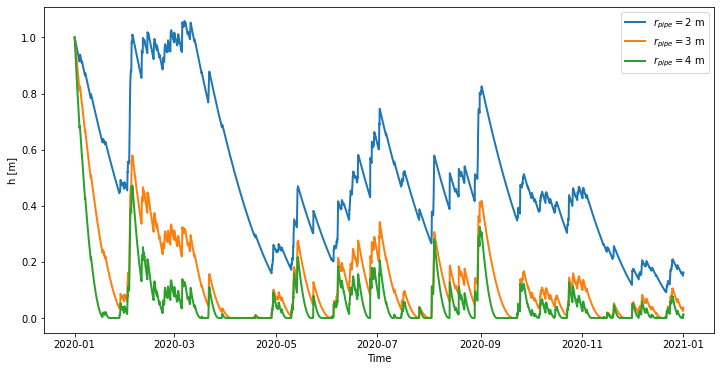

In [4]:
plt.figure(figsize=(12,6))
plt.xlabel('Time')
plt.ylabel('h [m]')
for i in range(len(rpipe)):
    plt.plot(N_times,h[:,i],linewidth=2,label='$r_{pipe}=$'+str(round(rpipe[i],1))+' m')
#plt.plot(t,h2,linewidth=2,color='red',label='$r_{pipe}=2$ m')
plt.legend()

... done